Importing packages

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

%matplotlib inline

loading the dataset

In [2]:
facebook = pd.read_csv(
    "facebook_combined.txt",
    sep=" ",
    names=["start_node", "end_node"],
)
facebook

,start_node,end_node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


In [4]:
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

In [5]:
G.number_of_nodes()

4039

In [6]:
G.number_of_edges()

88234

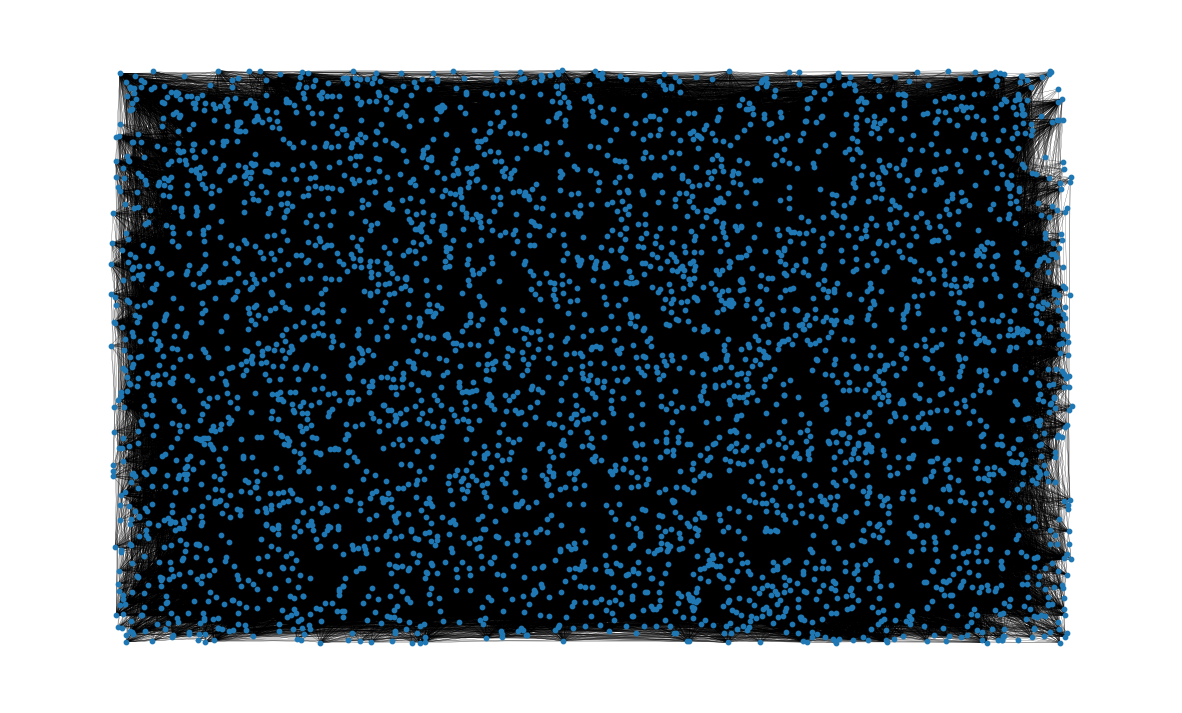

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

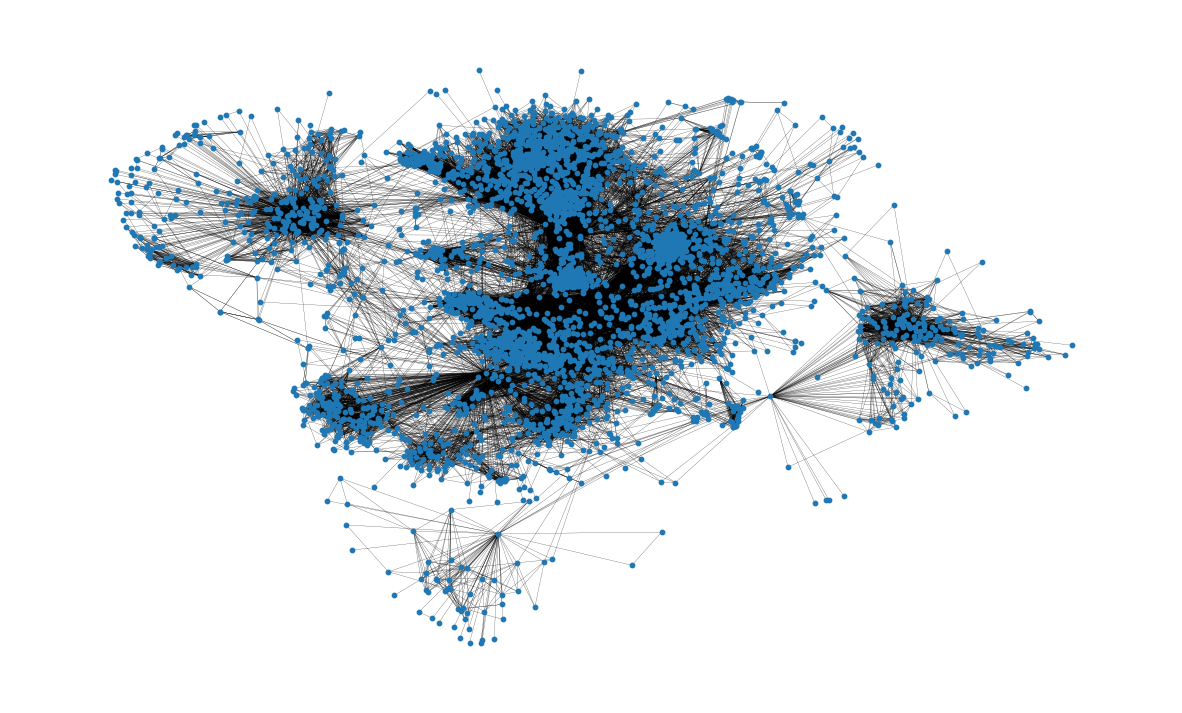

In [ ]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

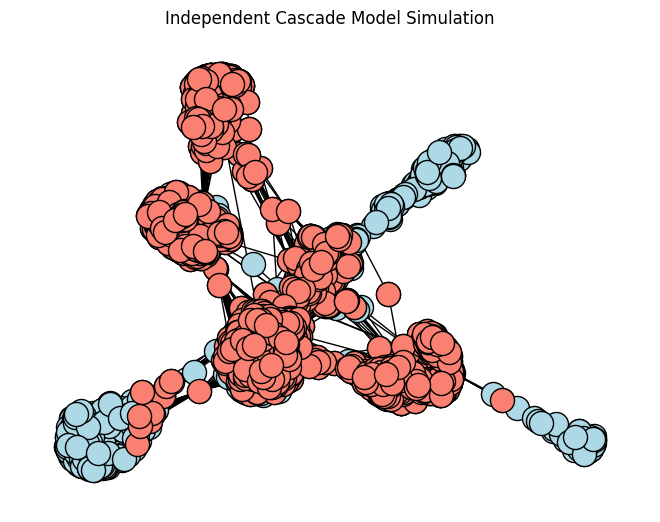

In [ ]:
import numpy as np

def independent_cascade_model(graph, seed_nodes, p=0.1, max_iter=10):

    # Nodes that are activated during the simulation
    activated_nodes = set(seed_nodes)

    for _ in range(max_iter):
        newly_activated_nodes = set()

        # Iterate over activated nodes and attempt to activate neighbors
        for node in activated_nodes:
            neighbors = set(graph.neighbors(node))
            neighbors -= activated_nodes  # Remove already activated neighbors

            # Activate neighbors with probability p
            for neighbor in neighbors:
                if np.random.rand() < p:
                    newly_activated_nodes.add(neighbor)

        # Update the set of activated nodes
        activated_nodes.update(newly_activated_nodes)

        # If no new nodes are activated, end the simulation
        if not newly_activated_nodes:
            break

    return list(activated_nodes)

# we pick 5 seed nodes at random btw 1-100
seed_nodes = [randint(1, 100) for _ in range(5)]

# Probability of activation(p)
probability_of_activation = 0.1

# Running ICM
activated_nodes = independent_cascade_model(G, seed_nodes, p=probability_of_activation)

# Visualization
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_color='lightblue',edgecolors='black', font_weight='bold')
nx.draw_networkx_nodes(G, pos, nodelist=activated_nodes, node_color='salmon',edgecolors='black')
plt.title("Independent Cascade Model Simulation")
plt.show()


In [ ]:
#files created for gephi visualzation

nx.write_gexf(G, "facebook_network.gexf")

# Create a new graph for the activated nodes
activated_graph = G.subgraph(activated_nodes)
nx.write_gexf(activated_graph, "activated_nodes.gexf")

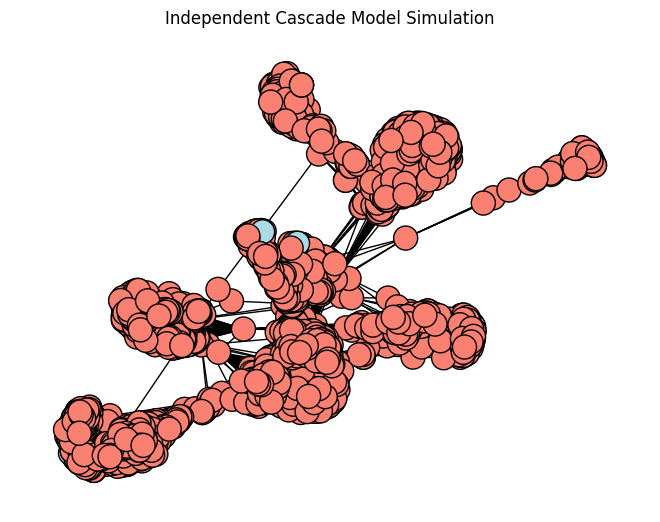

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def independent_cascade_model(graph, seed_nodes, p=0.1, max_iter=1000):

    activated_nodes = set(seed_nodes)

    for _ in range(max_iter):
        newly_activated_nodes = set()

        for node in activated_nodes:
            neighbors = set(graph.neighbors(node))
            neighbors -= activated_nodes

            for neighbor in neighbors:
                if np.random.rand() < p:
                    newly_activated_nodes.add(neighbor)

        activated_nodes.update(newly_activated_nodes)

        if not newly_activated_nodes:
            break

    return list(activated_nodes)

# Create a graph
facebook = nx.read_edgelist("facebook_combined.txt", create_using=nx.Graph(), nodetype=int)

# Example usage:
# Seed nodes (nodes to be initially activated)
seed_nodes = [np.random.choice(list(facebook.nodes)) for _ in range(5)]

# Probability of activation
probability_of_activation = 0.1

# Run the Independent Cascade Model
activated_nodes = independent_cascade_model(facebook, seed_nodes, p=probability_of_activation)

# Add node attributes for visualization in Gephi
node_color = {node: 'salmon' if node in activated_nodes else 'lightblue' for node in facebook.nodes}
nx.set_node_attributes(facebook, node_color, 'color')

# Save the graph to a GEXF file
nx.write_gexf(facebook, "facebook_icm_simulation.gexf")

# Visualization using Matplotlib
pos = nx.spring_layout(facebook)
nx.draw(facebook, pos, with_labels=False, node_color=node_color.values(),edgecolors='black', font_weight='bold')
plt.title("Independent Cascade Model Simulation")
plt.show()


In [ ]:
# Save the graph to a GEXF file
nx.write_gexf(G, "graph_for_gephi.gexf")

# Save the results to a GEXF file
result_nodes = {'Node': list(G.nodes()), 'Activated': [1 if node in activated_nodes else 0 for node in G.nodes()]}
result_graph = nx.DiGraph()
result_graph.add_nodes_from(result_nodes['Node'])
result_graph.add_nodes_from(result_nodes['Activated'])
nx.write_gexf(result_graph, "result_for_gephi.gexf")

In [ ]:
nx.write_gexf(G, "facebook_graph.gexf")

# Create a new graph to represent activated nodes
activated_graph = G.subgraph(activated_nodes)
nx.write_gexf(activated_graph, "acti_nodes.gexf")

In [ ]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

def independent_cascade_model(graph, seed_nodes, p=0.1, max_iter=1000):
    activated_nodes = set(seed_nodes)

    for _ in range(max_iter):
        newly_activated_nodes = set()

        for node in activated_nodes:
            neighbors = set(graph.neighbors(node))
            neighbors -= activated_nodes

            for neighbor in neighbors:
                if np.random.rand() < p:
                    newly_activated_nodes.add(neighbor)

        activated_nodes.update(newly_activated_nodes)

        if not newly_activated_nodes:
            break

    return list(activated_nodes)

# Create a graph
facebook = nx.read_edgelist("facebook_combined.txt", create_using=nx.Graph(), nodetype=int)

# Example usage:
# Seed nodes (nodes to be initially activated)
seed_nodes = [np.random.choice(list(facebook.nodes)) for _ in range(5)]

# Probability of activation
probability_of_activation = 0.1

# Run the Independent Cascade Model
activated_nodes = independent_cascade_model(facebook, seed_nodes, p=probability_of_activation)

# Add node attributes for visualization in Gephi
node_color = {node: 'salmon' if node in activated_nodes else 'lightblue' for node in facebook.nodes}
nx.set_node_attributes(facebook, node_color, 'color')

# Save the graph to a GEXF file with additional attributes
nx.write_gexf(facebook, "graph_for_gephi.gexf")

# Save edge list to a CSV file for Gephi
nx.write_edgelist(facebook, "edge_list_for_gephi.csv", delimiter=',')

# Save node attributes to a CSV file for Gephi
node_attributes_df = pd.DataFrame.from_dict(node_color, orient='index', columns=['color'])
node_attributes_df.index.name = 'node'
node_attributes_df.to_csv("node_attributes_for_gephi.csv")

# Visualization using Matplotlib
pos = nx.spring_layout(facebook)
nx.draw(facebook, pos, with_labels=False, node_color=node_color.values(),edgecolors='black', font_weight='bold')
plt.title("Independent Cascade Model Simulation")
plt.show()


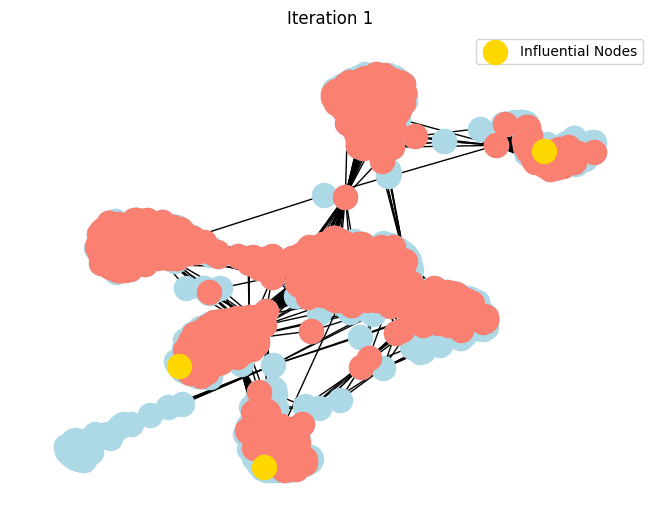

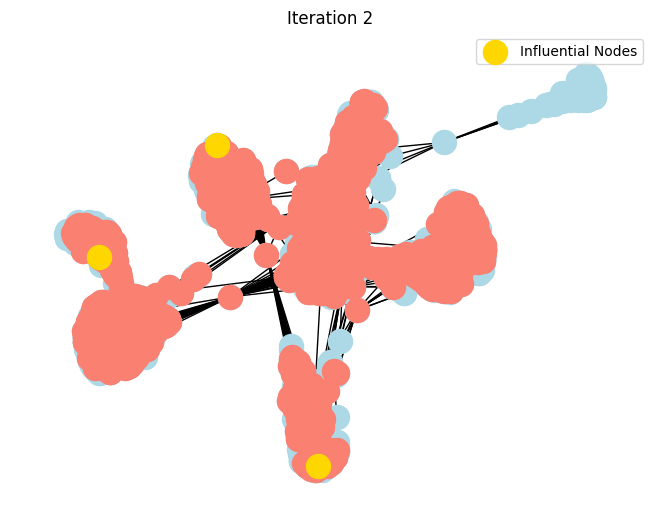

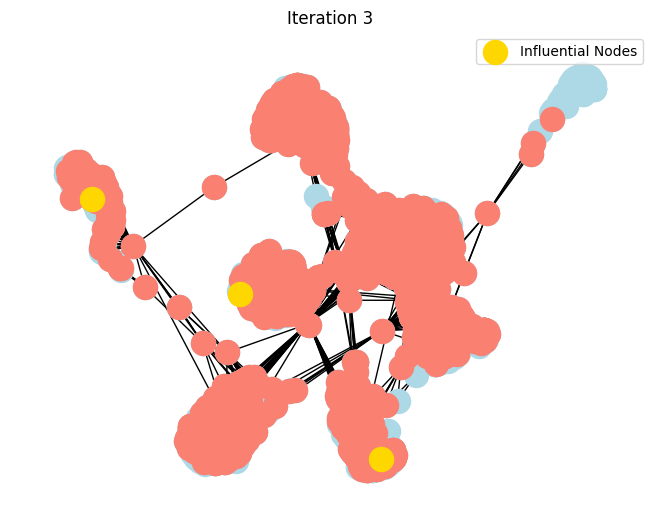

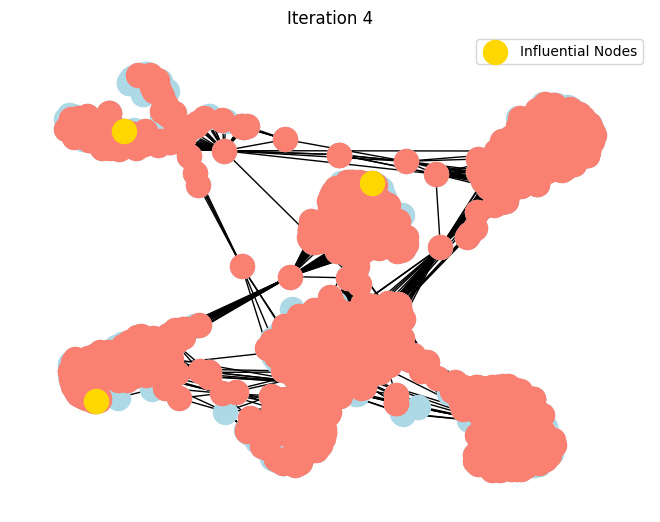

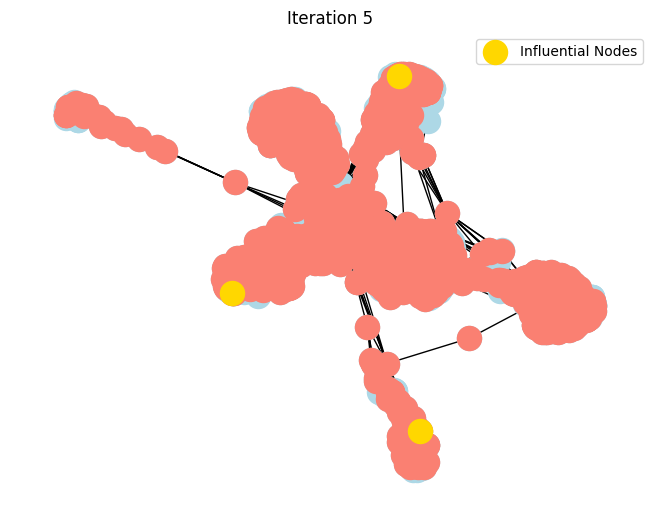

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from random import randint

def plot_graph_with_activation(graph, activated_nodes, iteration, influential_nodes=None):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=False, node_color='lightblue', font_weight='bold')
    nx.draw_networkx_nodes(graph, pos, nodelist=activated_nodes, node_color='salmon')

    if influential_nodes:
        nx.draw_networkx_nodes(graph, pos, nodelist=influential_nodes, node_color='gold', label='Influential Nodes')
        plt.legend()  # Add legend only if influential_nodes is not None

    plt.title(f"Iteration {iteration}")
    plt.show()

def independent_cascade_model(graph, seed_nodes, p=0.1):
    activated_nodes = set(seed_nodes)
    newly_activated_nodes = set(seed_nodes)

    while newly_activated_nodes:
        current_nodes = newly_activated_nodes.copy()
        newly_activated_nodes = set()

        for node in current_nodes:
            neighbors = set(graph.neighbors(node))
            neighbors -= activated_nodes

            for neighbor in neighbors:
                if np.random.rand() < p:
                    newly_activated_nodes.add(neighbor)

        activated_nodes.update(newly_activated_nodes)

    return list(activated_nodes)

def independent_cascade_model_visualization(graph, seed_nodes, p=0.1, max_iter=5):
    activated_nodes_list = []

    for iteration in range(max_iter):
        seed_nodes = independent_cascade_model(graph, seed_nodes, p)
        activated_nodes_list.append(seed_nodes.copy())

    return activated_nodes_list

def celf_influence_maximization(graph, k=5, p=0.1):
    influential_nodes = []
    remaining_nodes = set(graph.nodes)

    # Calculate initial spreads
    spreads = {node: len(independent_cascade_model(graph, [node], p)) for node in remaining_nodes}

    for _ in range(k):
        max_gain = 0
        best_node = None

        for node in remaining_nodes:
            # Calculate marginal gain
            spread = len(independent_cascade_model(graph, influential_nodes + [node], p))
            gain = spread - spreads[node]

            if gain > max_gain:
                max_gain = gain
                best_node = node

        if best_node:
            influential_nodes.append(best_node)
            remaining_nodes.remove(best_node)

            # Update spreads only for affected nodes
            for node in remaining_nodes:
                neighbors = set(graph.neighbors(node))
                if best_node in neighbors:
                    spreads[node] = len(independent_cascade_model(graph, influential_nodes + [node], p))

    return influential_nodes

# Example usage:
seed_nodes = [randint(1, 100) for _ in range(5)]
probability_of_activation = 0.1

# Perform Independent Cascade Model visualization with influence maximization using CELF
activated_nodes_list = independent_cascade_model_visualization(G, seed_nodes, p=probability_of_activation)

# Perform CELF Influence Maximization
k = 3  # Set the number of influential nodes to select
influential_nodes = celf_influence_maximization(G, k=k, p=probability_of_activation)

# Plot all iterations of the Independent Cascade Model
for i, activated_nodes in enumerate(activated_nodes_list):
    plot_graph_with_activation(G, activated_nodes, iteration=i + 1, influential_nodes=influential_nodes)


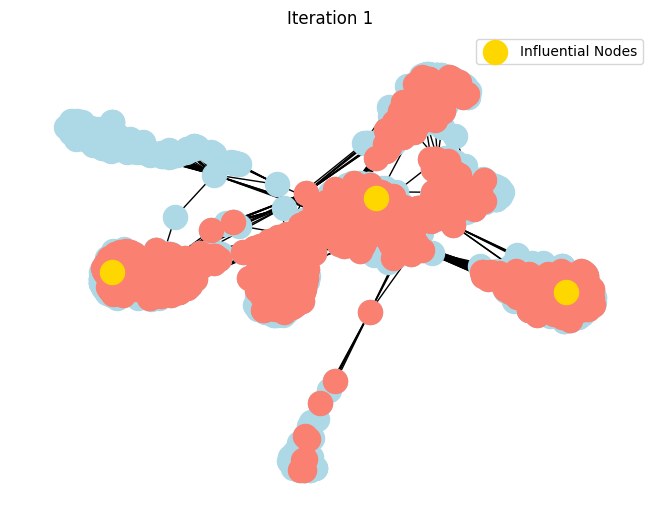

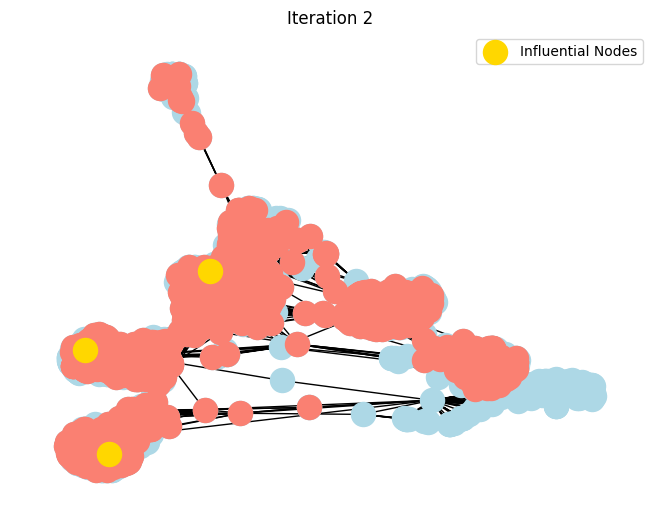

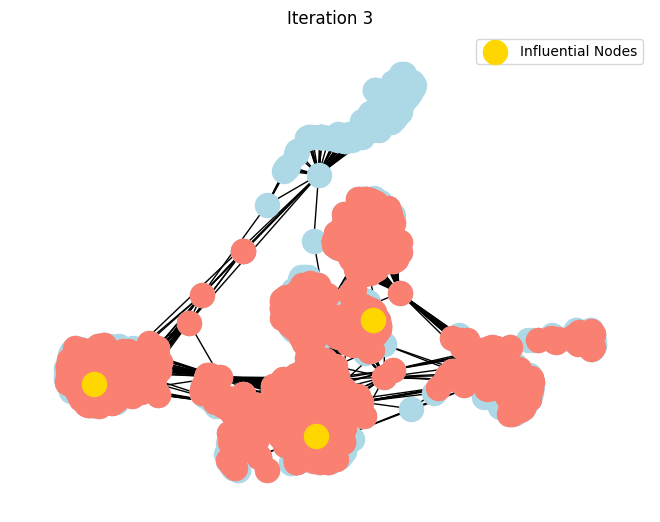

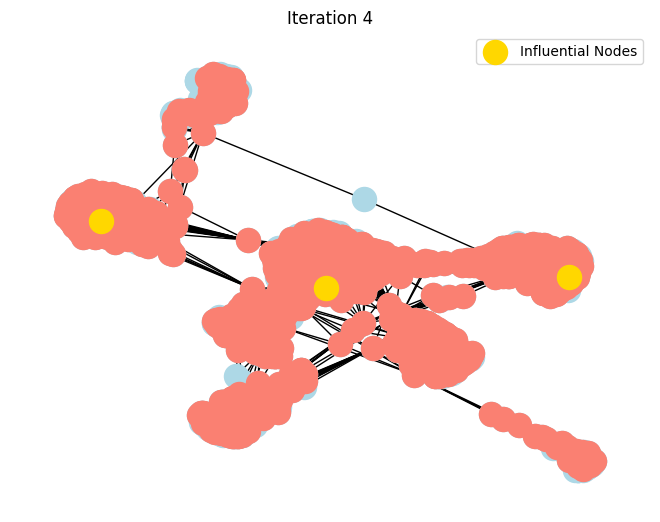

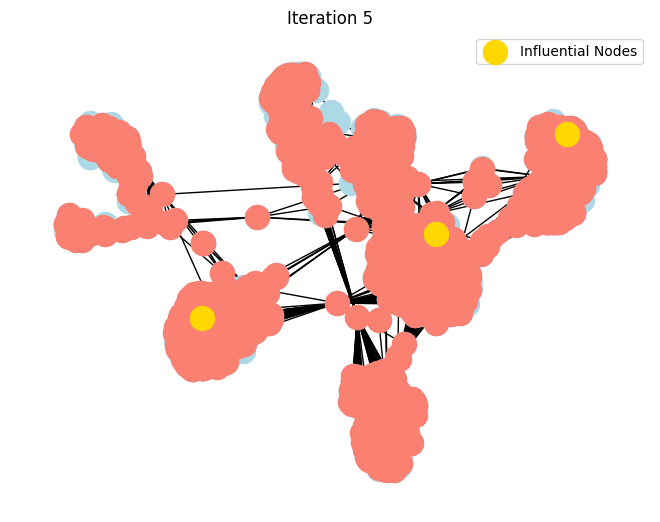

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from random import randint

# Load Facebook graph data
facebook = pd.read_csv(
    "facebook_combined.txt",
    sep=" ",
    names=["start_node", "end_node"],
)

# Create a graph from the loaded data
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

def plot_graph_with_activation(graph, activated_nodes, iteration, influential_nodes=None):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=False, node_color='lightblue', font_weight='bold')
    nx.draw_networkx_nodes(graph, pos, nodelist=activated_nodes, node_color='salmon')

    if influential_nodes:
        nx.draw_networkx_nodes(graph, pos, nodelist=influential_nodes, node_color='gold', label='Influential Nodes')
        plt.legend()  # Add legend only if influential_nodes is not None

    plt.title(f"Iteration {iteration}")
    plt.show()

def independent_cascade_model(graph, seed_nodes, influential_nodes, p=0.1):
    activated_nodes = set(seed_nodes)
    newly_activated_nodes = set(seed_nodes)

    # Remove influential nodes from the graph
    if influential_nodes:
        graph_removed_influential = graph.copy()
        graph_removed_influential.remove_nodes_from(influential_nodes)
    else:
        graph_removed_influential = graph

    while newly_activated_nodes:
        current_nodes = newly_activated_nodes.copy()
        newly_activated_nodes = set()

        for node in current_nodes:
            if node not in graph_removed_influential:
                continue  # Skip nodes that have been removed

            neighbors = set(graph_removed_influential.neighbors(node))
            neighbors -= activated_nodes

            for neighbor in neighbors:
                if np.random.rand() < p:
                    newly_activated_nodes.add(neighbor)

        activated_nodes.update(newly_activated_nodes)

    return list(activated_nodes)

def independent_cascade_model_visualization(graph, seed_nodes, p=0.1, influential_nodes=None, max_iter=5):
    activated_nodes_list = []

    for iteration in range(max_iter):
        seed_nodes = independent_cascade_model(graph, seed_nodes, influential_nodes, p)
        activated_nodes_list.append(seed_nodes.copy())

    return activated_nodes_list

def celf_influence_maximization(graph, k=5, p=0.1):
    influential_nodes = []
    remaining_nodes = set(graph.nodes)

    # Calculate initial spreads
    spreads = {node: len(independent_cascade_model(graph, [node], influential_nodes, p)) for node in remaining_nodes}

    for _ in range(k):
        max_gain = 0
        best_node = None

        for node in remaining_nodes:
            # Calculate marginal gain
            spread = len(independent_cascade_model(graph, influential_nodes + [node], influential_nodes, p))
            gain = spread - spreads[node]

            if gain > max_gain:
                max_gain = gain
                best_node = node

        if best_node:
            influential_nodes.append(best_node)
            remaining_nodes.remove(best_node)

            # Update spreads only for affected nodes
            for node in remaining_nodes:
                neighbors = set(graph.neighbors(node))
                if best_node in neighbors:
                    spreads[node] = len(independent_cascade_model(graph, influential_nodes + [node], influential_nodes, p))

    return influential_nodes


seed_nodes = [randint(1, 100) for _ in range(5)]
probability_of_activation = 0.1

# Perform CELF Influence Maximization
k = 3  # Set the number of influential nodes to select
influential_nodes = celf_influence_maximization(G, k=k, p=probability_of_activation)

# Perform Independent Cascade Model visualization with influence maximization using CELF
activated_nodes_list = independent_cascade_model_visualization(G, seed_nodes, p=probability_of_activation, influential_nodes=influential_nodes)

# Plot all iterations of the Independent Cascade Model
for i, activated_nodes in enumerate(activated_nodes_list):
    plot_graph_with_activation(G, activated_nodes, iteration=i + 1, influential_nodes=influential_nodes)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from random import randint

# Load Facebook graph data
facebook = pd.read_csv(
    "facebook_combined.txt",
    sep=" ",
    names=["start_node", "end_node"],
)

# Create a graph from the loaded data
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

def independent_cascade_model(graph, seed_nodes, influential_nodes, p=0.1):
    activated_nodes = set(seed_nodes)
    newly_activated_nodes = set(seed_nodes)

    while newly_activated_nodes:
        current_nodes = newly_activated_nodes.copy()
        newly_activated_nodes = set()

        for node in current_nodes:
            if node not in graph:
                continue  # Skip nodes that have been removed

            neighbors = set(graph.neighbors(node))
            neighbors -= activated_nodes

            for neighbor in neighbors:
                if np.random.rand() < p:
                    newly_activated_nodes.add(neighbor)

        activated_nodes.update(newly_activated_nodes)

    return list(activated_nodes)

def plot_activation_side_by_side(graph, activated_nodes_with, activated_nodes_without, iteration, influential_nodes=None):
    plt.figure(figsize=(12, 6))

    # Plot with influential nodes
    plt.subplot(1, 2, 1)
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=False, node_color='lightblue', font_weight='bold')
    nx.draw_networkx_nodes(graph, pos, nodelist=activated_nodes_with, node_color='salmon')
    if influential_nodes:
        nx.draw_networkx_nodes(graph, pos, nodelist=influential_nodes, node_color='gold', label='Influential Nodes')
        plt.legend()
    plt.title(f"Iteration {iteration} (With Influential Nodes)\nActivated Nodes: {len(activated_nodes_with)}")

    # Plot without influential nodes
    plt.subplot(1, 2, 2)
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=False, node_color='lightblue', font_weight='bold')
    nx.draw_networkx_nodes(graph, pos, nodelist=activated_nodes_without, node_color='salmon')
    plt.title(f"Iteration {iteration} (Without Influential Nodes)\nActivated Nodes: {len(activated_nodes_without)}")

    plt.show()

def independent_cascade_model_visualization_side_by_side(graph, seed_nodes, p=0.1, influential_nodes=None, max_iter=5):
    activated_nodes_list_with_influential = []
    activated_nodes_list_without_influential = []

    for iteration in range(max_iter):
        # With influential nodes
        seed_nodes_with_influential = independent_cascade_model(graph, seed_nodes, influential_nodes, p)
        activated_nodes_list_with_influential.append(seed_nodes_with_influential.copy())

        # Without influential nodes
        seed_nodes_without_influential = independent_cascade_model(graph, seed_nodes, None, p)
        activated_nodes_list_without_influential.append(seed_nodes_without_influential.copy())

        # Run ICM after removing 10 most influential nodes
        if influential_nodes:
            influential_nodes_to_remove = influential_nodes[:min(10, len(influential_nodes))]
            graph_without_influential = graph.copy()
            graph_without_influential.remove_nodes_from(influential_nodes_to_remove)

            seed_nodes_after_removal = independent_cascade_model(graph_without_influential, seed_nodes, None, p)
            activated_nodes_list_without_influential[-1] = seed_nodes_after_removal.copy()

    return activated_nodes_list_with_influential, activated_nodes_list_without_influential

def celf_influence_maximization(graph, k, p=0.1):
    influential_nodes = []
    remaining_nodes = set(graph.nodes)

    # Calculate initial spreads
    spreads = {node: len(independent_cascade_model(graph, [node], influential_nodes, p)) for node in remaining_nodes}

    for _ in range(k):
        max_gain = 0
        best_node = None

        for node in remaining_nodes:
            # Calculate marginal gain
            spread = len(independent_cascade_model(graph, influential_nodes + [node], influential_nodes, p))
            gain = spread - spreads[node]

            if gain > max_gain:
                max_gain = gain
                best_node = node

        if best_node:
            influential_nodes.append(best_node)
            remaining_nodes.remove(best_node)

            # Update spreads only for affected nodes
            for node in remaining_nodes:
                neighbors = set(graph.neighbors(node))
                if best_node in neighbors:
                    spreads[node] = len(independent_cascade_model(graph, influential_nodes + [node], influential_nodes, p))

    return influential_nodes

# Example usage:
seed_nodes = [randint(1, 100) for _ in range(5)]
probability_of_activation = 0.1

# Perform CELF Influence Maximization
k = 10  # Set the number of influential nodes to select
influential_nodes = celf_influence_maximization(G, k, p=probability_of_activation)

# Perform Independent Cascade Model visualization with and without influential nodes side by side
activated_nodes_list_with, activated_nodes_list_without = independent_cascade_model_visualization_side_by_side(
    G, seed_nodes, p=probability_of_activation, influential_nodes=influential_nodes, max_iter=5
)

# Plot activations side by side for each iteration
for i, (activated_nodes_with, activated_nodes_without) in enumerate(zip(activated_nodes_list_with, activated_nodes_list_without)):
    plot_activation_side_by_side(G, activated_nodes_with, activated_nodes_without, iteration=i + 1, influential_nodes=influential_nodes)
